In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd

In [2]:
d0 = pd.read_csv('hmm_results/ubersum.csv')
d1 = pd.read_csv('hmm_results/train.csv')
d2 = pd.read_csv('hmm_results/sample.csv')
d3 = pd.read_csv('hmm_results/map.csv')
d4 = pd.read_csv('hmm_results/marginal.csv')

In [3]:
d0

,plate_size,time
0,8,0.001270
1,16,0.001213
2,24,0.001247
3,32,0.001263
4,40,0.001198
5,48,0.001501
6,56,0.001241
7,64,0.001206
8,72,0.001224
9,80,0.001210


In [3]:
y0 = d0['time'].values * 1e3
y1 = d1['time'].values * 1e3
y2 = d2['time'].values * 1e3
y3 = d3['time'].values * 1e3
y4 = d4['time'].values * 1e3
x = d0['plate_size'].values ** 2

In [4]:
matplotlib.rcParams.update({'font.size': 7})
matplotlib.rc('xtick', labelsize=7) 
matplotlib.rc('ytick', labelsize=7) 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
#%config InlineBackend.figure_format = 'retina'

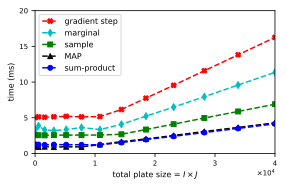

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.8, 2.5))
fig.patch.set_color('white')
# order by decreasing runtime
ax.plot(x[::2], y1[::2], 'rX--', markersize=5, label='gradient step')
ax.plot(x[::2], y4[::2], 'cd--', markersize=5, label='marginal')
ax.plot(x[::2], y2[::2], 'gs--', markersize=5, label='sample')
ax.plot(x[::2], y3[::2], 'k^--', markersize=5, label='MAP')
ax.plot(x[::2], y0[::2], 'bo--', markersize=5, label='sum-product')
ax.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
ax.xaxis.major.formatter._useMathText = True
ax.set_xlabel(r'total plate size = $I \times J$', fontsize=8)
ax.set_ylabel(r"time (ms)", fontsize=8)
ax.set_xlim(0, 40000)
ax.set_ylim(0, 20)
leg = plt.legend(prop={'size': 8})
plt.yticks([0, 5, 10, 15, 20])
plt.xticks([0, 10000, 20000, 30000, 40000])
fig.subplots_adjust(left=0.15)
fig.tight_layout(pad=0)
fig.savefig('sumprod_runtime.eps')
